In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

### Simple Neural Network - Binary Classification

In [ ]:
dataset = load_breast_cancer()

In [ ]:
X, y = dataset.data, dataset.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=3)

In [ ]:
X_train.shape, X_test.shape

((512, 30), (57, 30))

In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 0.6792 - accuracy: 0.5859 - val_loss: 0.5736 - val_accuracy: 0.7544
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5229 - accuracy: 0.8184 - val_loss: 0.4585 - val_accuracy: 0.8596
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4301 - accuracy: 0.9004 - val_loss: 0.3845 - val_accuracy: 0.9474
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3698 - accuracy: 0.9238 - val_loss: 0.3338 - val_accuracy: 0.9298
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3270 - accuracy: 0.9375 - val_loss: 0.2971 - val_accuracy: 0.9298
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.2950 - accuracy: 0.9414 - val_loss: 0.2690 - val_accuracy: 0.9298
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.2702 - accuracy: 0.9434 - val_loss: 0.2467 - val_accuracy: 0.9123
Epoch 8/20
16

In [ ]:
evalLoss, evalAccuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evalAccuracy * 100:.2f}%")
print(f"Test loss: {evalLoss}")

2/2 [==============================] - 0s 150ms/step - loss: 0.1412 - accuracy: 0.9298
Test accuracy: 92.98%
Test loss: 0.14122320711612701


In [ ]:
ypred = model.predict(X_test)

2/2 [==============================] - 0s 15ms/step


In [ ]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
ypred

array([[0.9396039 ],
       [0.6976157 ],
       [0.93362194],
       [0.9936764 ],
       [0.14878754],
       [0.88138175],
       [0.89296347],
       [0.9728021 ],
       [0.9888247 ],
       [0.9746109 ],
       [0.9368207 ],
       [0.03454762],
       [0.9825936 ],
       [0.53156424],
       [0.99039257],
       [0.9101963 ],
       [0.97110873],
       [0.9947013 ],
       [0.00521903],
       [0.8801752 ],
       [0.96638703],
       [0.96492904],
       [0.80236775],
       [0.81583077],
       [0.95389026],
       [0.99504036],
       [0.87772155],
       [0.01032086],
       [0.0209461 ],
       [0.95171183],
       [0.5567143 ],
       [0.9951553 ],
       [0.9144548 ],
       [0.9624352 ],
       [0.93751866],
       [0.91477245],
       [0.98687154],
       [0.9955115 ],
       [0.09498243],
       [0.01621003],
       [0.01129021],
       [0.9620967 ],
       [0.96028286],
       [0.05740355],
       [0.8148052 ],
       [0.3994813 ],
       [0.5054073 ],
       [0.689

In [ ]:
classLabels = (ypred > 0.5).astype(int)

In [ ]:
classLabels.flatten()

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, classLabels))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        41

    accuracy                           0.93        57
   macro avg       0.93      0.89      0.91        57
weighted avg       0.93      0.93      0.93        57



### Simple Neural Network - Regression

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
X, y = housing.data, housing.target

In [ ]:
X.shape

(20640, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="SGD", loss="mean_squared_error", metrics=["mse"])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20)

Epoch 1/20
516/516 [==============================] - 9s 13ms/step - loss: 0.7422 - mse: 0.7422 - val_loss: 0.5215 - val_mse: 0.5215
Epoch 2/20
516/516 [==============================] - 5s 10ms/step - loss: 0.4999 - mse: 0.4999 - val_loss: 0.4735 - val_mse: 0.4735
Epoch 3/20
516/516 [==============================] - 4s 7ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.4475 - val_mse: 0.4475
Epoch 4/20
516/516 [==============================] - 3s 5ms/step - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4384 - val_mse: 0.4384
Epoch 5/20
516/516 [==============================] - 3s 6ms/step - loss: 0.4385 - mse: 0.4385 - val_loss: 0.4220 - val_mse: 0.4220
Epoch 6/20
516/516 [==============================] - 4s 8ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.4104 - val_mse: 0.4104
Epoch 7/20
516/516 [==============================] - 4s 8ms/step - loss: 0.4197 - mse: 0.4197 - val_loss: 0.4043 - val_mse: 0.4043
Epoch 8/20
516/516 [==============================] - 5s 9ms/step - loss: 

In [ ]:
loss, mse = model.evaluate(X_test_scaled, y_test)
print("Test mean squared error is", mse)

129/129 [==============================] - 2s 17ms/step - loss: 0.3547 - mse: 0.3547
Test mean squared error is 0.35468506813049316


In [ ]:
ypred = model.predict(X_test_scaled)

129/129 [==============================] - 2s 10ms/step


In [ ]:
ypred.flatten()[:15]

array([1.538969 , 1.0149635, 2.0436354, 1.5530512, 2.5255246, 2.1764977,
       2.5821807, 4.607812 , 1.2550735, 2.6576195, 2.3513737, 1.3178887,
       2.5665042, 3.1994665, 2.1002488], dtype=float32)

In [ ]:
y_test[:15]

array([1.188  , 1.188  , 2.133  , 1.903  , 1.598  , 1.845  , 2.141  ,
       5.00001, 1.013  , 1.878  , 4.125  , 0.985  , 1.698  , 3.405  ,
       2.664  ])

### Simple Neural Network - Multi Classification

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
X,y = dataset.data, dataset.target

In [ ]:
X.shape

(150, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
len(dataset.target_names)

3

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(len(dataset.target_names), activation="softmax"))

In [ ]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 16)                80        
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20)

Epoch 1/20
5/5 [==============================] - 4s 315ms/step - loss: 1.0333 - accuracy: 0.4148 - val_loss: 1.0649 - val_accuracy: 0.5333
Epoch 2/20
5/5 [==============================] - 0s 41ms/step - loss: 0.9818 - accuracy: 0.4667 - val_loss: 1.0075 - val_accuracy: 0.6667
Epoch 3/20
5/5 [==============================] - 0s 67ms/step - loss: 0.9395 - accuracy: 0.5185 - val_loss: 0.9422 - val_accuracy: 0.6000
Epoch 4/20
5/5 [==============================] - 0s 49ms/step - loss: 0.8929 - accuracy: 0.5926 - val_loss: 0.8946 - val_accuracy: 0.6000
Epoch 5/20
5/5 [==============================] - 0s 49ms/step - loss: 0.8580 - accuracy: 0.6000 - val_loss: 0.8502 - val_accuracy: 0.6000
Epoch 6/20
5/5 [==============================] - 0s 59ms/step - loss: 0.8256 - accuracy: 0.6000 - val_loss: 0.8039 - val_accuracy: 0.6000
Epoch 7/20
5/5 [==============================] - 0s 61ms/step - loss: 0.7929 - accuracy: 0.6519 - val_loss: 0.7705 - val_accuracy: 0.6000
Epoch 8/20
5/5 [==========

In [ ]:
evalLoss, evalAccuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {evalAccuracy * 100:.2f}%")
print(f"Test loss: {evalLoss}")

1/1 [==============================] - 0s 149ms/step - loss: 0.5136 - accuracy: 0.8000
Test accuracy: 80.00%
Test loss: 0.5135704874992371


In [ ]:
ypred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 258ms/step


In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(ypred, axis=1)

In [ ]:
y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.40      0.57         5
           2       0.75      1.00      0.86         3

    accuracy                           0.80        15
   macro avg       0.84      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15



### Multiclass Case with deep neural network

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
from matplotlib import pyplot as plt

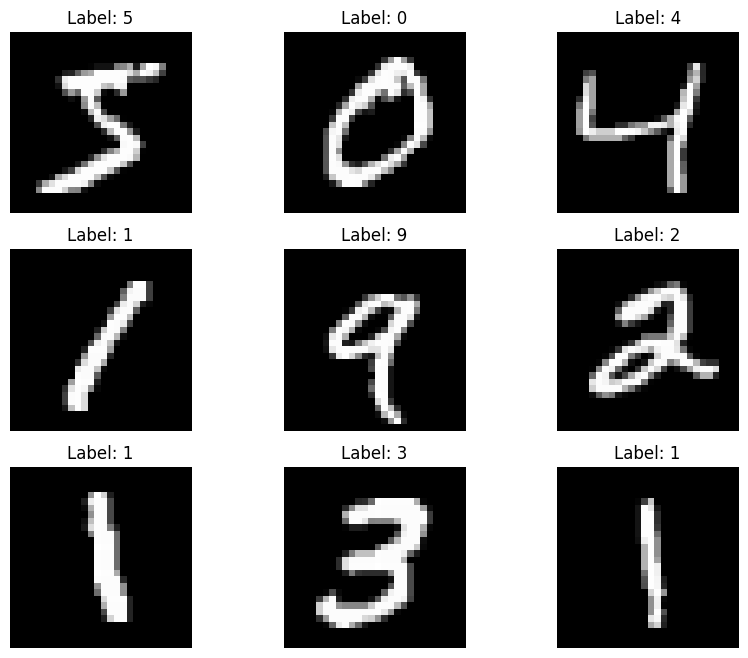

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [ ]:
X_test.shape, X_train.shape

((10000, 784), (60000, 784))

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
len(set(y_train))

10

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(len(set(y_train)), activation="softmax"))

In [ ]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.2145 - val_accuracy: 0.9662
Epoch 2/30
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.2191 - val_accuracy: 0.9657
Epoch 3/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.2221 - val_accuracy: 0.9662
Epoch 4/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.2254 - val_accuracy: 0.9662
Epoch 5/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.2276 - val_accuracy: 0.9664
Epoch 6/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.2295 - val_accuracy: 0.9656
Epoch 7/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.2337 -

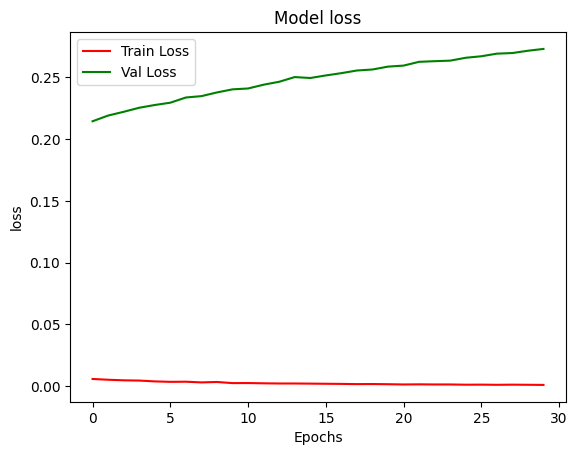

In [ ]:
plt.plot(history.history["loss"], 'r')
plt.plot(history.history["val_loss"], 'g')
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train Loss", "Val Loss"])
plt.show()

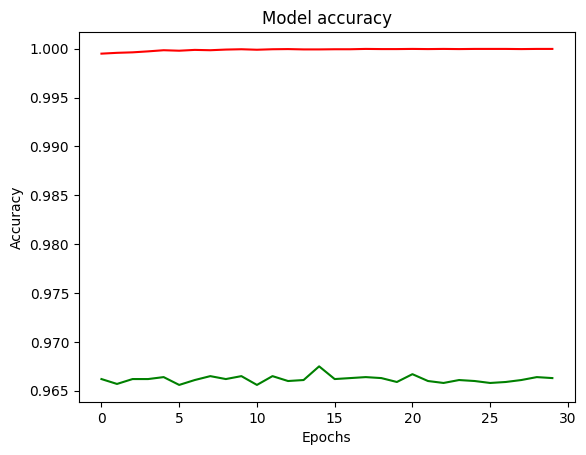

In [ ]:
plt.plot(history.history["accuracy"], 'r')
plt.plot(history.history["val_accuracy"], 'g')
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
evalLoss, evalAccuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {evalAccuracy * 100:.2f}%")
print(f"Test loss: {evalLoss}")

313/313 [==============================] - 4s 14ms/step - loss: 0.2144 - accuracy: 0.9652
Test accuracy: 96.52%
Test loss: 0.21437636017799377


In [ ]:
ypred = model.predict(X_test_scaled)

313/313 [==============================] - 9s 22ms/step


In [ ]:
ypred

array([[2.5326269e-10, 2.9766031e-10, 4.6666437e-10, ..., 9.9999994e-01,
        4.1796268e-14, 4.4416018e-10],
       [3.8101363e-16, 4.9572136e-14, 9.9999994e-01, ..., 1.2309550e-15,
        3.9808974e-16, 5.2211904e-22],
       [3.5684554e-08, 9.9967599e-01, 3.0176514e-06, ..., 5.0041313e-06,
        2.9799901e-04, 9.3760821e-10],
       ...,
       [1.6869358e-17, 5.8350762e-11, 3.4812446e-09, ..., 1.7285037e-08,
        2.4421765e-10, 7.7459772e-09],
       [4.1808678e-23, 2.0498190e-28, 2.1833076e-24, ..., 8.8305880e-32,
        4.8247788e-11, 6.3233759e-23],
       [1.5226875e-11, 1.8048962e-16, 1.8014834e-17, ..., 2.8986055e-19,
        4.3267697e-14, 1.1305534e-15]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(ypred, axis=1)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



### Regularization

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(len(set(y_train)), activation="softmax"))

In [ ]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 40s 19ms/step - loss: 2.0002 - accuracy: 0.8248 - val_loss: 1.3059 - val_accuracy: 0.9254
Epoch 2/30
1875/1875 [==============================] - 29s 15ms/step - loss: 1.0421 - accuracy: 0.9323 - val_loss: 0.8377 - val_accuracy: 0.9397
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7125 - accuracy: 0.9437 - val_loss: 0.6142 - val_accuracy: 0.9474
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5500 - accuracy: 0.9505 - val_loss: 0.5023 - val_accuracy: 0.9520
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4672 - accuracy: 0.9546 - val_loss: 0.4451 - val_accuracy: 0.9540
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4215 - accuracy: 0.9577 - val_loss: 0.4083 - val_accuracy: 0.9561
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3954 - accuracy: 0.9600 - val_loss: 0.3902 - val_

In [ ]:
evalLoss, evalAccuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {evalAccuracy * 100:.2f}%")
print(f"Test loss: {evalLoss}")

313/313 [==============================] - 24s 75ms/step - loss: 0.2922 - accuracy: 0.9670
Test accuracy: 96.70%
Test loss: 0.2921806275844574


In [ ]:
ypred = model.predict(X_test_scaled)

313/313 [==============================] - 4s 12ms/step


In [ ]:
ypred

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(ypred, axis=1)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.94      0.96      1028
           8       0.95      0.96      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Dropouts

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(len(set(y_train)), activation="softmax"))

In [ ]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1617 - accuracy: 0.6134 - val_loss: 0.4018 - val_accuracy: 0.8942
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6361 - accuracy: 0.8088 - val_loss: 0.3090 - val_accuracy: 0.9166
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5202 - accuracy: 0.8480 - val_loss: 0.2654 - val_accuracy: 0.9243
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4608 - accuracy: 0.8685 - val_loss: 0.2366 - val_accuracy: 0.9351
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4266 - accuracy: 0.8769 - val_loss: 0.2248 - val_accuracy: 0.9380
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3874 - accuracy: 0.8905 - val_loss: 0.2150 - val_accuracy: 0.9414
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3699 - accuracy: 0.8947 - val_loss: 0.2052 - val_accur

In [ ]:
evalLoss, evalAccuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {evalAccuracy * 100:.2f}%")
print(f"Test loss: {evalLoss}")

313/313 [==============================] - 2s 8ms/step - loss: 0.1573 - accuracy: 0.9643
Test accuracy: 96.43%
Test loss: 0.15727920830249786


In [ ]:
import cv2

In [ ]:
img = cv2.imread("./zeros.png", 0)

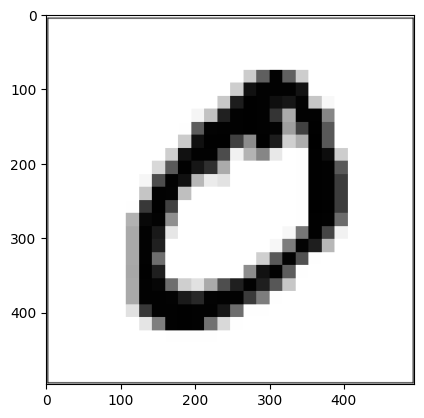

In [ ]:
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
invertImg = cv2.bitwise_not(img)

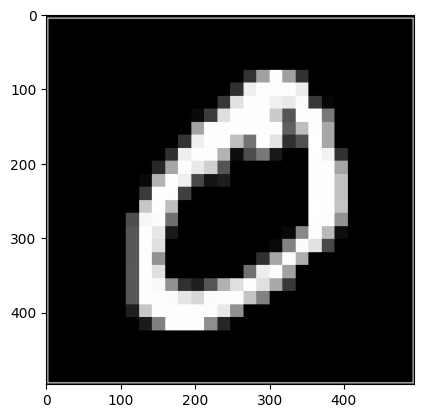

In [ ]:
plt.imshow(invertImg,cmap="gray")
plt.show()

In [ ]:
resizeImg = cv2.resize(invertImg, (28,28))

In [ ]:
invertImg.shape, resizeImg.shape

((497, 495), (28, 28))

In [ ]:
reshapeImg = resizeImg.reshape(784)

In [ ]:
reshapeImg.shape

(784,)

In [ ]:
reshapeImgScaled = scaler.transform([reshapeImg])

In [ ]:
reshapeImgScaled.shape

(1, 784)

In [ ]:
pred = model.predict(reshapeImgScaled)

1/1 [==============================] - 0s 39ms/step


In [ ]:
np.argmax(pred, axis=1)

array([0])

In [ ]:
pred

array([[9.9999928e-01, 9.1243369e-21, 6.6994716e-07, 2.0411528e-09,
        3.6950079e-16, 1.2562238e-08, 4.7810924e-09, 1.8337504e-10,
        3.0495673e-10, 2.7483622e-14]], dtype=float32)

In [ ]:
pred = model.predict

### Optimizer Comparison

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(len(set(y_train)), activation="softmax"))
    return model

In [ ]:
optimizers = {
    "SGD": SGD(),
    "Adam": Adam(),
    "RMSprop": RMSprop(),
    "Adagrad": Adagrad(),
    "Nadam": Nadam()
}

In [ ]:
optimizer_performance = {}


In [ ]:
for name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
    score = model.evaluate(X_test, y_test)
    optimizer_performance[name] = score
    print(f"Optimizer: {name}, Score : {score}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1687 - accuracy: 0.9531
Optimizer: SGD, Score : [0.1686728149652481, 0.9531000256538391]
313/313 [==============================] - 1s 4ms/step - loss: 0.1275 - accuracy: 0.9670
Optimizer: Adam, Score : [0.12754008173942566, 0.9670000076293945]
313/313 [==============================] - 1s 4ms/step - loss: 0.1538 - accuracy: 0.9659
Optimizer: RMSprop, Score : [0.1538495570421219, 0.9659000039100647]
313/313 [==============================] - 1s 4ms/step - loss: 0.6437 - accuracy: 0.8611
Optimizer: Adagrad, Score : [0.6436970233917236, 0.8611000180244446]
313/313 [==============================] - 2s 6ms/step - loss: 0.1165 - accuracy: 0.9679
Optimizer: Nadam, Score : [0.11653081327676773, 0.9678999781608582]


In [ ]:
optimizer_performance

{'SGD': [0.1686728149652481, 0.9531000256538391],
 'Adam': [0.12754008173942566, 0.9670000076293945],
 'RMSprop': [0.1538495570421219, 0.9659000039100647],
 'Adagrad': [0.6436970233917236, 0.8611000180244446],
 'Nadam': [0.11653081327676773, 0.9678999781608582]}

In [ ]:
best_optimizer = max(optimizer_performance, key=lambda x: optimizer_performance[x][1])

In [ ]:
best_optimizer

'Nadam'

In [ ]:
best_score = optimizer_performance[best_optimizer]

In [ ]:
print(f"\nBest Optimizer for MNIST Dataset: {best_optimizer} with Accuracy: {best_score[1]:.4f}")


Best Optimizer for MNIST Dataset: Nadam with Accuracy: 0.9679


In [ ]:
model = create_model()
model.compile(optimizer=Nadam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=0)
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1195 - accuracy: 0.9733


In [ ]:
import cv2

img = cv2.imread("./second.png", 0)
invertImg = cv2.bitwise_not(img)
resizeImg = cv2.resize(invertImg, (28,28))
reshapeImg = resizeImg.reshape(784)
reshapeImgScaled = reshapeImg.astype('float32') / 255

In [ ]:
reshapeImgScaled.shape

(784,)

In [ ]:
reshapeImgScaled.reshape(1,-1).shape

(1, 784)

In [ ]:
pred = model.predict(reshapeImgScaled.reshape(1,-1))

1/1 [==============================] - 0s 141ms/step


In [ ]:
pred

array([[3.3323021e-11, 1.9457134e-06, 9.9745160e-01, 1.0206196e-03,
        7.3436396e-10, 2.6727098e-09, 5.8203377e-12, 1.5255776e-03,
        2.7770250e-07, 7.2820444e-10]], dtype=float32)

In [ ]:
np.argmax(pred, axis=1)

array([2])

### CNN

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = np.expand_dims(x_train, -1) / 255.0
x_test = np.expand_dims(x_test, -1) / 255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
num_classes = 10
input_shape = (28,28,1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",  loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9137 - loss: 0.2949 - val_accuracy: 0.9802 - val_loss: 0.0589
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step - accuracy: 0.9829 - loss: 0.0518 - val_accuracy: 0.9832 - val_loss: 0.0531
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9906 - loss: 0.0319 - val_accuracy: 0.9834 - val_loss: 0.0497
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9868 - val_loss: 0.0400
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9867 - val_loss: 0.0469
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9972 - loss: 0.0081 - val_accuracy: 0.9861 - val_loss: 0.0438
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 25ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9855 - val_loss: 0.0518
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.9991 -

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9824 - loss: 0.0894


In [ ]:
loss, accuracy

(0.06315406411886215, 0.9871000051498413)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",  loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8325 - loss: 0.5147 - val_accuracy: 0.9772 - val_loss: 0.0706
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9706 - loss: 0.0955 - val_accuracy: 0.9818 - val_loss: 0.0647
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9801 - loss: 0.0663 - val_accuracy: 0.9850 - val_loss: 0.0497
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9838 - loss: 0.0497 - val_accuracy: 0.9877 - val_loss: 0.0414
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9879 - val_loss: 0.0419
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9894 - val_loss: 0.0375
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9888 - loss: 0.0344 - val_accuracy: 0.9890 - val_loss: 0.0414
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9908 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9862 - loss: 0.0587


[0.04637250304222107, 0.9890999794006348]

### leNet-5

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

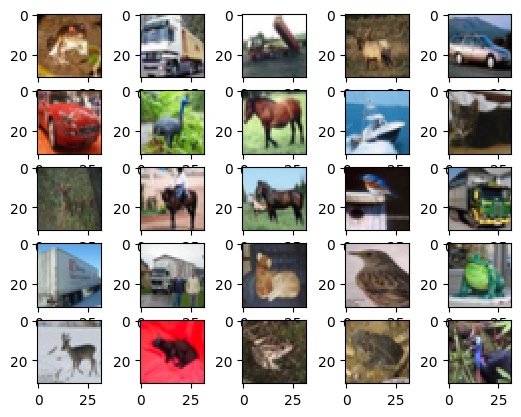

In [ ]:
import matplotlib.pyplot as plt

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    # plt.title(y_train[i])
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='tanh', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(5,5), activation='tanh',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128, kernel_size=(5,5), activation='tanh', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))

model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",  loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,426 (1.05 MB)

 Trainable params: 276,426 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 102ms/step - accuracy: 0.4083 - loss: 1.6195 - val_accuracy: 0.6069 - val_loss: 1.1162
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 102ms/step - accuracy: 0.6173 - loss: 1.0799 - val_accuracy: 0.6297 - val_loss: 1.0687
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 102ms/step - accuracy: 0.6771 - loss: 0.9159 - val_accuracy: 0.6536 - val_loss: 1.0051
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 103ms/step - accuracy: 0.7123 - loss: 0.8156 - val_accuracy: 0.6563 - val_loss: 0.9892
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.7466 - loss: 0.7312 - val_accuracy: 0.6521 - val_loss: 1.0390
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 104ms/step - accuracy: 0.7683 - loss: 0.6627 - val_accuracy: 0.6441 - val_loss: 1.0564
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 103ms/step - accuracy: 0.7961 - loss: 0.5906 - val_accuracy: 0.6560 - val_loss: 1.0549
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 103ms/step - ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6501 - loss: 1.2686


(1.2844232320785522, 0.6474000215530396)

leNet-5 with Data Augumentation

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
datagen.fit(x_train)

In [ ]:
batch_size = 64

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=15, validation_data=(x_test, y_test))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.3798 - loss: 1.7133 - val_accuracy: 0.5584 - val_loss: 1.2332
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5327 - loss: 1.3234 - val_accuracy: 0.5940 - val_loss: 1.1271
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.5757 - loss: 1.2047 - val_accuracy: 0.6384 - val_loss: 1.0376
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.6035 - loss: 1.1227 - val_accuracy: 0.6228 - val_loss: 1.0710
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6160 - loss: 1.0878 - val_accuracy: 0.6545 - val_loss: 0.9899
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6323 - loss: 1.0537 - val_accuracy: 0.6467 - val_loss: 1.0040
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6399 - loss: 1.0252 - val_accuracy: 0.6724 - val_loss: 0.9466
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6498 - loss: 0.9975 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6974 - loss: 0.8857


(0.8926975727081299, 0.690500020980835)

Custom CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="RMSprop",  loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 622,282 (2.37 MB)

 Trainable params: 621,322 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5033 - loss: 1.4594 - val_accuracy: 0.5998 - val_loss: 1.1865
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7185 - loss: 0.8074 - val_accuracy: 0.7079 - val_loss: 0.8576
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7790 - loss: 0.6329 - val_accuracy: 0.6573 - val_loss: 0.9994
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.5029 - val_accuracy: 0.6595 - val_loss: 1.0471
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8604 - loss: 0.4082 - val_accuracy: 0.6378 - val_loss: 1.2786
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8884 - loss: 0.3206 - val_accuracy: 0.7483 - val_loss: 0.8687
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9122 - loss: 0.2591 - val_accuracy: 0.7134 - val_loss: 0.9607
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9276 - loss: 0.213

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7250 - loss: 1.3135


(1.3198127746582031, 0.7210999727249146)

### Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# One-hot encoding of the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the base model layers
base_model.trainable = False

In [ ]:
model = Sequential()
model.add(Resizing(224, 224, input_shape=(32, 32, 3)))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 215ms/step - accuracy: 0.1221 - loss: 2.3076 - val_accuracy: 0.2395 - val_loss: 2.0263
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 194ms/step - accuracy: 0.2365 - loss: 2.0241 - val_accuracy: 0.2597 - val_loss: 1.9768
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 194ms/step - accuracy: 0.2485 - loss: 1.9864 - val_accuracy: 0.2571 - val_loss: 1.9544
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 215ms/step - accuracy: 0.2586 - loss: 1.9456 - val_accuracy: 0.2501 - val_loss: 1.9169
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 186s 194ms/step - accuracy: 0.2674 - loss: 1.9191 - val_accuracy: 0.2455 - val_loss: 1.9478
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 194ms/step - accuracy: 0.2681 - loss: 1.9173 - val_accuracy: 0.2934 - val_loss: 1.8547
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 214ms/step - accuracy: 0.2795 - loss: 1.8954 - val_accuracy: 0.2704 - val_loss: 1.8837
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 186s 194ms/step - accuracy: 0.2927 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.2945 - loss: 1.8919


(1.8938775062561035, 0.2906999886035919)

In [ ]:
# fine tuning the. model
for layer in base_model.layers[-10:]:
    layer.trainable = True

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 7,093,770 (27.06 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [ ]:
fineTuneHistory = model.fit(x_train,y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 240ms/step - accuracy: 0.1644 - loss: 2.7403 - val_accuracy: 0.1072 - val_loss: 7.7403
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 209ms/step - accuracy: 0.3730 - loss: 1.6696 - val_accuracy: 0.1511 - val_loss: 4.7457
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 230ms/step - accuracy: 0.4519 - loss: 1.4926 - val_accuracy: 0.1778 - val_loss: 5.2387
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 208ms/step - accuracy: 0.4807 - loss: 1.4248 - val_accuracy: 0.1545 - val_loss: 4.7399
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.4982 - loss: 1.3797 - val_accuracy: 0.1710 - val_loss: 6.2064


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.1703 - loss: 6.2581


(6.206365585327148, 0.17100000381469727)

### Real Time Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Define directories for your 15-scene image dataset
dataset_dir = './15-Scene/'
image_size = (150, 150)

In [ ]:
all_data = []
all_labels = []

classes = os.listdir(dataset_dir)
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        all_data.append(img_path)
        all_labels.append(class_name)

In [ ]:
all_data[:5], all_labels[:5]

(['./15-Scene/12/3691.jpg',
  './15-Scene/12/3767.jpg',
  './15-Scene/12/3779.jpg',
  './15-Scene/12/3810.jpg',
  './15-Scene/12/3901.jpg'],
 ['12', '12', '12', '12', '12'])

In [ ]:
len(all_data)

4485

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.2)

In [ ]:
len(train_data), len(test_data)

(3588, 897)

In [ ]:
# Data Augmentation and Image Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, horizontal_flip=True, zoom_range=0.2)

In [ ]:
train_gen = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3588 validated image filenames belonging to 15 classes.


In [ ]:
testing_gen = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_data, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 897 validated image filenames belonging to 15 classes.


In [ ]:
train_gen = datagen.flow_from_directory(dataset_dir, target_size=image_size, batch_size=32, class_mode='categorical', subset='training')
test_gen = datagen.flow_from_directory(dataset_dir, target_size=image_size, batch_size=32, class_mode='categorical', subset='validation')


Found 4042 images belonging to 15 classes.
Found 443 images belonging to 15 classes.


In [ ]:
model = Sequential()

# first block
model.add(Conv2D(32, (3,3), padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# second block
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# third block
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(train_gen.num_classes, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      10,617,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,716,111 (40.88 MB)

 Trainable params: 10,715,151 (40.88 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(train_gen, validation_data=test_gen, epochs=30, batch_size=32)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 48s 268ms/step - accuracy: 0.2828 - loss: 2.4089 - val_accuracy: 0.0813 - val_loss: 7.9034
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.5008 - loss: 1.5615 - val_accuracy: 0.0813 - val_loss: 8.7397
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.5574 - loss: 1.3414 - val_accuracy: 0.1219 - val_loss: 4.6297
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.6108 - loss: 1.1754 - val_accuracy: 0.1129 - val_loss: 5.2887
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.6482 - loss: 1.0431 - val_accuracy: 0.3544 - val_loss: 2.1148
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.6726 - loss: 0.9907 - val_accuracy: 0.3251 - val_loss: 2.9048
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.6791 - loss: 0.9587 - val_accuracy: 0.5824 - val_loss: 1.3302
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.7018 - loss: 0.8836 - val

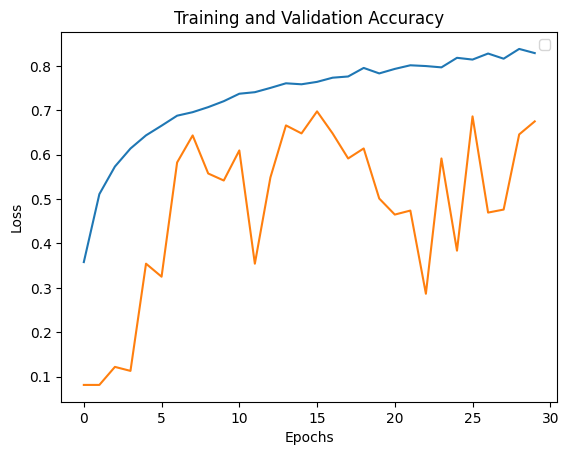

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(testing_gen, verbose=2)

# Print the final accuracy for the current optimizer
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

29/29 - 5s - 177ms/step - accuracy: 0.8562 - loss: 0.4607

Final Test Accuracy: 0.8562


### RNN

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
max_features = 10000  # Number of words to consider as features
maxlen = 500

In [3]:
# Split the data into train and test sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Pad sequences (ensure each input has the same length)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.5645 - loss: 0.6665 - val_accuracy: 0.7705 - val_loss: 0.4922
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.7555 - loss: 0.5155 - val_accuracy: 0.6611 - val_loss: 0.6083
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.7930 - loss: 0.4712 - val_accuracy: 0.7861 - val_loss: 0.4670
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8533 - loss: 0.3482 - val_accuracy: 0.7740 - val_loss: 0.4867
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9004 - loss: 0.2580 - val_accuracy: 0.7554 - val_loss: 0.5341
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9232 - loss: 0.2041 - val_accuracy: 0.7345 - val_loss: 0.6263
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9595 - loss: 0.1218 - val_accuracy: 0.7836 - val_loss: 0.6098
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9837 - loss: 0.0616 - 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.7587 - loss: 0.9086
Test Accuracy: 0.7608799934387207


In [12]:
model_stacked = Sequential()
model_stacked.add(Embedding(max_features, 32))
model_stacked.add(SimpleRNN(32, return_sequences=True))
model_stacked.add(SimpleRNN(32))
model_stacked.add(Dense(1, activation='sigmoid'))

In [13]:
model_stacked.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_stacked.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.6187 - loss: 0.6297 - val_accuracy: 0.7912 - val_loss: 0.4589
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 146ms/step - accuracy: 0.8525 - loss: 0.3526 - val_accuracy: 0.8228 - val_loss: 0.4065
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 126ms/step - accuracy: 0.9067 - loss: 0.2399 - val_accuracy: 0.6898 - val_loss: 0.6016
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 123ms/step - accuracy: 0.9069 - loss: 0.2354 - val_accuracy: 0.8080 - val_loss: 0.5372
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9818 - loss: 0.0631 - val_accuracy: 0.7857 - val_loss: 0.7163
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9949 - loss: 0.0205 - val_accuracy: 0.7946 - val_loss: 0.8450
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.9859 - loss: 0.0421 - val_accuracy: 0.7904 - val_loss: 0.9214
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9988 - loss: 0

In [15]:
test_loss, test_acc = model_stacked.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7637 - loss: 1.0445
Test Accuracy: 0.7674400210380554


In [16]:
texts = [
   "I absolutely loved this movie, the storyline was engaging!",
   "The film was too slow and boring for my taste.",
   "A perfect blend of comedy and drama, truly enjoyable!"
]

In [17]:
word_index = tf.keras.datasets.imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
reverse_word_index = {value: key for (key, value) in word_index.items()}

In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([ ' '.join([str(word) for word in sequence]) for sequence in x_train])

In [21]:
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = sequence.pad_sequences(sequences, maxlen=maxlen)

In [22]:
padded_sequences[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [23]:
model.predict(padded_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


array([[0.9984623],
       [0.9984623],
       [0.9984623]], dtype=float32)

In [24]:
model_stacked.predict(padded_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


array([[0.99980736],
       [0.99980736],
       [0.99980736]], dtype=float32)

In [28]:
model_stacked_lstm = Sequential()
model_stacked_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_stacked_lstm.add(LSTM(64, return_sequences=True))
model_stacked_lstm.add(LSTM(64))
model_stacked_lstm.add(Dense(1, activation='sigmoid'))

In [30]:
model_stacked_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
model_stacked_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_stacked_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.7372 - loss: 0.5029 - val_accuracy: 0.8202 - val_loss: 0.4093
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8887 - loss: 0.2825 - val_accuracy: 0.7716 - val_loss: 0.4769
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9199 - loss: 0.2067 - val_accuracy: 0.8655 - val_loss: 0.3191
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9546 - loss: 0.1294 - val_accuracy: 0.8656 - val_loss: 0.4269
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9028 - loss: 0.2320 - val_accuracy: 0.8570 - val_loss: 0.3751


In [33]:
loss, accuracy = model_stacked_lstm.evaluate(x_test, y_test)
print(f"Stacked LSTM Test Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8584 - loss: 0.3718
Stacked LSTM Test Accuracy: 0.8570399880409241


In [34]:
model_stacked_lstm.predict(padded_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


array([[0.75663024],
       [0.75663024],
       [0.75663024]], dtype=float32)

In [1]:
# Bidirectional RNN
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, SimpleRNN, LSTM
from tensorflow.keras.utils import to_categorical

In [2]:
max_features = 10000
maxlen = 200

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

In [6]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1488878 (5.68 MB)
Trainable params: 148887

In [9]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
141/141 [==============================] - 42s 250ms/step - loss: 2.1456 - accuracy: 0.4625 - val_loss: 1.7855 - val_accuracy: 0.5183
Epoch 2/15
141/141 [==============================] - 34s 239ms/step - loss: 1.6899 - accuracy: 0.5590 - val_loss: 1.8735 - val_accuracy: 0.4858
Epoch 3/15
141/141 [==============================] - 33s 235ms/step - loss: 1.6028 - accuracy: 0.5919 - val_loss: 1.7015 - val_accuracy: 0.5788
Epoch 4/15
141/141 [==============================] - 34s 239ms/step - loss: 1.4429 - accuracy: 0.6389 - val_loss: 1.5871 - val_accuracy: 0.5917
Epoch 5/15
141/141 [==============================] - 33s 236ms/step - loss: 1.2763 - accuracy: 0.6698 - val_loss: 1.4729 - val_accuracy: 0.6247
Epoch 6/15
141/141 [==============================] - 33s 236ms/step - loss: 1.1611 - accuracy: 0.7014 - val_loss: 1.4526 - val_accuracy: 0.6322
Epoch 7/15
141/141 [==============================] - 33s 236ms/step - loss: 1.0515 - accuracy: 0.7287 - val_loss: 1.7414 - val_ac

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

71/71 [==============================] - 4s 54ms/step - loss: 1.6479 - accuracy: 0.6652
Test Accuracy: 0.6651825308799744


In [11]:
texts = [
   "The stock market is experiencing significant gains today.",
   "Scientists have discovered a new species in the Amazon rainforest.",
   "The football match ended with a surprising score of 3-1."
]

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
word_index = reuters.get_word_index()
class_labels = {i: f"Category {i}" for i in range(46)}
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([ ' '.join([str(word) for word in sequence]) for sequence in x_train])
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = sequence.pad_sequences(sequences, maxlen=maxlen)

550378/550378 [==============================] - 0s 0us/step


In [14]:
ypred = model.predict(padded_sequences)

1/1 [==============================] - 0s 49ms/step


In [15]:
import numpy as np
np.argmax(ypred, axis=1)

array([4, 4, 4])

In [17]:
# GRU
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, Dense

In [18]:
max_features = 10000
maxlen = 150

In [19]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [20]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [22]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 128, input_length=maxlen))
model_gru.add(GRU(64))
model_gru.add(Dense(1, activation='sigmoid'))

In [23]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model_gru.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
391/391 [==============================] - 38s 93ms/step - loss: 0.4102 - accuracy: 0.8027 - val_loss: 0.3265 - val_accuracy: 0.8617
Epoch 2/15
391/391 [==============================] - 36s 93ms/step - loss: 0.2372 - accuracy: 0.9063 - val_loss: 0.3306 - val_accuracy: 0.8569
Epoch 3/15
391/391 [==============================] - 36s 92ms/step - loss: 0.1671 - accuracy: 0.9394 - val_loss: 0.3624 - val_accuracy: 0.8549
Epoch 4/15
391/391 [==============================] - 36s 91ms/step - loss: 0.1115 - accuracy: 0.9613 - val_loss: 0.4137 - val_accuracy: 0.8595
Epoch 5/15
391/391 [==============================] - 36s 93ms/step - loss: 0.0780 - accuracy: 0.9723 - val_loss: 0.4811 - val_accuracy: 0.8522
Epoch 6/15
391/391 [==============================] - 36s 93ms/step - loss: 0.0537 - accuracy: 0.9824 - val_loss: 0.5421 - val_accuracy: 0.8515
Epoch 7/15
391/391 [==============================] - 36s 93ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.5642 - val_accuracy:

In [25]:
loss, accuracy = model_gru.evaluate(x_test, y_test)
print(f"GRU Model Test Accuracy: {accuracy}")

782/782 [==============================] - 12s 15ms/step - loss: 0.9934 - accuracy: 0.8507
GRU Model Test Accuracy: 0.8507199883460999


In [26]:
texts = [
  "I absolutely loved this movie, the storyline was engaging!",
  "The film was too slow and boring for my taste.",
  "A perfect blend of comedy and drama, truly enjoyable!"
]

In [27]:
word_index = tf.keras.datasets.imdb.get_word_index()
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([ ' '.join([str(word) for word in sequence]) for sequence in x_train])
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

1641221/1641221 [==============================] - 0s 0us/step


In [28]:
model_gru.predict(padded_sequences)

1/1 [==============================] - 0s 359ms/step


array([[0.01174901],
       [0.01174901],
       [0.01174901]], dtype=float32)

In [29]:
# text generation using lstm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
text = """Shall I compare thee to a summer's day? Thou art more lovely and more temperate.
        Rough winds do shake the darling buds of May, And summer's lease hath all too short a date."""


In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [32]:
total_words = len(tokenizer.word_index) + 1

In [33]:
total_words

30

In [34]:
input_sequences = []
for line in text.split('.'):
   token_list = tokenizer.texts_to_sequences([line])[0]
   for i in range(1, len(token_list)):
       n_gram_sequence = token_list[:i+1]
       input_sequences.append(n_gram_sequence)

In [35]:
input_sequences

[[5, 6],
 [5, 6, 7],
 [5, 6, 7, 8],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9, 1],
 [5, 6, 7, 8, 9, 1, 2],
 [5, 6, 7, 8, 9, 1, 2, 10],
 [5, 6, 7, 8, 9, 1, 2, 10, 11],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12, 3],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12, 3, 13],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12, 3, 13, 4],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12, 3, 13, 4, 3],
 [5, 6, 7, 8, 9, 1, 2, 10, 11, 12, 3, 13, 4, 3, 14],
 [15, 16],
 [15, 16, 17],
 [15, 16, 17, 18],
 [15, 16, 17, 18, 19],
 [15, 16, 17, 18, 19, 20],
 [15, 16, 17, 18, 19, 20, 21],
 [15, 16, 17, 18, 19, 20, 21, 22],
 [15, 16, 17, 18, 19, 20, 21, 22, 23],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2, 24],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2, 24, 25],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2, 24, 25, 26],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2, 24, 25, 26, 27],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 4, 2, 24, 25, 26, 27, 28],
 [1

In [36]:
max_sequence_len = max([len(x) for x in input_sequences])

In [37]:
max_sequence_len

18

In [38]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [40]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]

In [42]:
y

array([ 6,  7,  8,  9,  1,  2, 10, 11, 12,  3, 13,  4,  3, 14, 16, 17, 18,
       19, 20, 21, 22, 23,  4,  2, 24, 25, 26, 27, 28,  1, 29],
      dtype=int32)

In [43]:
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [44]:
model_textgen_lstm = Sequential()
model_textgen_lstm.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model_textgen_lstm.add(LSTM(100))
model_textgen_lstm.add(Dense(total_words, activation='softmax'))

In [45]:
model_textgen_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model_textgen_lstm.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.4003 - accuracy: 0.0323
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 3.3951 - accuracy: 0.0968
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 3.3900 - accuracy: 0.1290
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 3.3846 - accuracy: 0.1290
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 3.3789 - accuracy: 0.1935
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 3.3728 - accuracy: 0.2258
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 3.3660 - accuracy: 0.1935
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 3.3584 - accuracy: 0.1935
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 3.3496 - accuracy: 0.1613
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 3.3394 - accuracy: 0.1935
Epoch 11/100
1/1 [===

In [47]:
def generate_text(seed_text, next_words, max_sequence_len):
   for _ in range(next_words):
       token_list = tokenizer.texts_to_sequences([seed_text])[0]
       token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
       predicted = np.argmax(model_textgen_lstm.predict(token_list), axis=-1)
       output_word = ""
       for word, index in tokenizer.word_index.items():
           if index == predicted:
               output_word = word
               break
       seed_text += " " + output_word
   return seed_text


In [50]:
print(generate_text("Lovely summer", 3, max_sequence_len))

1/1 [==============================] - 0s 25ms/step
Lovely summer winds do shake


In [67]:
# text generation using lstm and glove
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
text = """Shall I compare thee to a summer's day? Thou art more lovely and more temperate.
        Rough winds do shake the darling buds of May, And summer's lease hath all too short a date.
        Sometime too hot the eye of heaven shines, And often is his gold complexion dimmed;
        And every fair from fair sometime declines, By chance or nature's changing course untrimmed;
        But thy eternal summer shall not fade, Nor lose possession of that fair thou ow'st;
        Nor shall Death brag thou wander'st in his shade, When in eternal lines to time thou grow'st:
        So long as men can breathe or eyes can see, So long lives this, and this gives life to thee."""

In [69]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [70]:
total_words = len(tokenizer.word_index) + 1

In [71]:
total_words

84

In [72]:
input_sequences = []
for line in text.split('.'):
   token_list = tokenizer.texts_to_sequences([line])[0]
   for i in range(1, len(token_list)):
       n_gram_sequence = token_list[:i+1]
       input_sequences.append(n_gram_sequence)

In [73]:
max_sequence_len = max([len(x) for x in input_sequences])

In [74]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [75]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]

In [76]:
y

array([23, 24,  7,  4,  8,  9, 25,  2, 26, 10, 27,  1, 10, 28, 30, 31, 32,
       11, 33, 34,  5, 35,  1,  9, 36, 37, 38, 12, 39,  8, 40, 12, 41, 11,
       42,  5, 43, 44,  1, 45, 46, 14, 47, 48, 49,  1, 50,  6, 51,  6, 13,
       52, 53, 54, 15, 55, 56, 57, 58, 59, 60, 16, 61,  3, 62, 63, 17, 64,
       65,  5, 66,  6,  2, 67, 17,  3, 68, 69,  2, 70, 18, 14, 71, 72, 18,
       16, 73,  4, 74,  2, 75, 19, 20, 76, 77, 21, 78, 15, 79, 21, 80, 19,
       20, 81, 22,  1, 22, 82, 83,  4,  7], dtype=int32)

In [77]:
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [78]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [88]:
from tensorflow.keras.layers import Dropout

In [89]:
model_textgen_lstm = Sequential()
model_textgen_lstm.add(Embedding(total_words, 100, weights=[embedding_matrix], trainable=False, input_length=max_sequence_len-1))
model_textgen_lstm.add(LSTM(100, return_sequences=True))
model_textgen_lstm.add(Dropout(0.2))
model_textgen_lstm.add(LSTM(50))
model_textgen_lstm.add(Dense(total_words, activation='softmax'))

In [90]:
model_textgen_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
model_textgen_lstm.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 68ms/step - loss: 4.4362 - accuracy: 0.0180
Epoch 2/100
4/4 [==============================] - 0s 65ms/step - loss: 4.3806 - accuracy: 0.0450
Epoch 3/100
4/4 [==============================] - 0s 69ms/step - loss: 4.3464 - accuracy: 0.0450
Epoch 4/100
4/4 [==============================] - 0s 65ms/step - loss: 4.3139 - accuracy: 0.0450
Epoch 5/100
4/4 [==============================] - 0s 66ms/step - loss: 4.2767 - accuracy: 0.0450
Epoch 6/100
4/4 [==============================] - 0s 66ms/step - loss: 4.2267 - accuracy: 0.0811
Epoch 7/100
4/4 [==============================] - 0s 70ms/step - loss: 4.1677 - accuracy: 0.0721
Epoch 8/100
4/4 [==============================] - 0s 64ms/step - loss: 4.0969 - accuracy: 0.0631
Epoch 9/100
4/4 [==============================] - 0s 64ms/step - loss: 4.0091 - accuracy: 0.0901
Epoch 10/100
4/4 [==============================] - 0s 68ms/step - loss: 3.9287 - accuracy: 0.0901
Epoch 11/100
4/4 [=

In [93]:
print(generate_text("Death brag", 4, max_sequence_len))

1/1 [==============================] - 0s 31ms/step
Death brag i compare to to


In [84]:
print(text)

Shall I compare thee to a summer's day? Thou art more lovely and more temperate.
        Rough winds do shake the darling buds of May, And summer's lease hath all too short a date.
        Sometime too hot the eye of heaven shines, And often is his gold complexion dimmed;
        And every fair from fair sometime declines, By chance or nature's changing course untrimmed;
        But thy eternal summer shall not fade, Nor lose possession of that fair thou ow'st;
        Nor shall Death brag thou wander'st in his shade, When in eternal lines to time thou grow'st:
        So long as men can breathe or eyes can see, So long lives this, and this gives life to thee.


In [ ]:
Death brag too hot the eye of heaven shines and often is



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values.astype('float32')

In [4]:
data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [6]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(data, look_back)

In [8]:
len(X), len(y)

(133, 133)

In [9]:
len(data)

144

In [10]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
X.shape

(133, 10, 1)

In [12]:
model_gru_ts = Sequential()
model_gru_ts.add(GRU(50, return_sequences=True, input_shape=(look_back, 1)))
model_gru_ts.add(GRU(50))
model_gru_ts.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model_gru_ts.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_gru_ts.fit(X, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1330
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0182
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0298
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0161
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0111
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095
Epoch 16/100
5/5 ━━

In [17]:
predictions = model_gru_ts.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform([y])

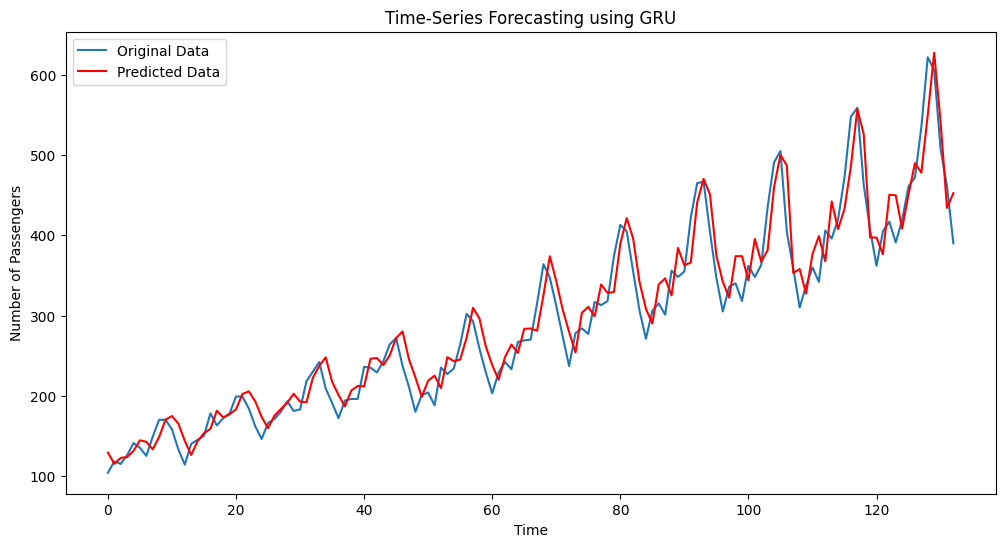

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_actual[0], label='Original Data')
plt.plot(predictions, label='Predicted Data', color='r')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Time-Series Forecasting using GRU')
plt.legend()
plt.show()